# Vectorize

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import numpy as np 
import pickle
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
%reload_ext version_information
%version_information pandas,numpy, nltk, seaborn, matplotlib

Software versions
Python 3.7.4 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.8.0
OS Darwin 19.0.0 x86_64 i386 64bit
pandas 0.25.1
numpy 1.17.2
nltk 3.4.5
seaborn 0.9.0
matplotlib 3.1.1
Mon Dec 09 13:25:42 2019 CET

# 2)- Loading Dataset

In [4]:
data=pd.read_pickle('file_clean.pkl')
data.head()

,text,class,clean,clean2
0,Supplier shall update the Documentation on a r...,1.0,Supplier shall update the Documentation on a r...,supplier shall update documentation regular ba...
1,"major release upgrades of Software, change of ...",1.0,major release upgrade of Software change of Eq...,major release upgrade software change equipmen...
2,Accept incident severity as set by E.ON Servic...,1.0,Accept incident severity a set by E ON Service...,accept incident severity set e service desk ce...
3,"Supplier shall provide all tools, documentatio...",1.0,Supplier shall provide all tool documentation ...,supplier shall provide tool documentation mate...
4,For smaller Projects a deviation can be agreed...,1.0,For smaller Projects a deviation can be agreed...,smaller project deviation agreed within projec...


# 3)-Visualization

### 3.1)-Understanding the common words

wordcloud

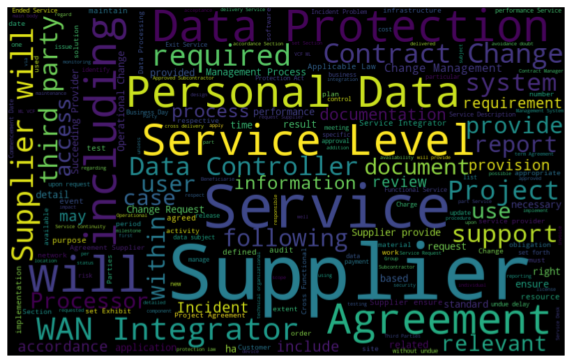

In [5]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['clean']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3.2)- For D&O class

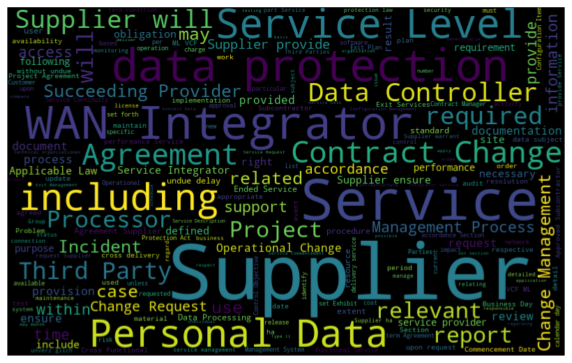

In [6]:
normal_words =' '.join([text for text in data['clean'][data['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3.3)- For Other class

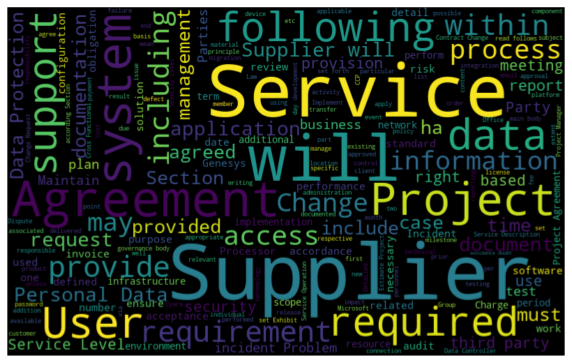

In [7]:
Other_class =' '.join([text for text in data['clean'][data['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Other_class)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 4)-Vectorization

- BoW
- TF-IDF
- word2vec
- doc2vec

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

### 4.1)-Bag of Words

In [9]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['clean'])

In [10]:
bow.shape

(8932, 1000)

In [11]:
bow

<8932x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 84071 stored elements in Compressed Sparse Row format>

In [12]:
type(bow)

scipy.sparse.csr.csr_matrix

**Converting sparse to dense matrix**

A sparse matrix is a matrix that is comprised of mostly zero values. Sparse matrices are distinct from matrices with mostly non-zero values, which are referred to as dense matrices
if most of the elements are nonzero, then the matrix is considered dense.

In [13]:
bow=bow.toarray()

In [14]:
type(bow)

numpy.ndarray

It is now in Document-term matrix form

In [15]:
bow_df = pd.DataFrame(bow, columns=bow_vectorizer.get_feature_names()) # see how we are converting to array instead of dataframe
bow_df.head()

,ability,able,accept,acceptance,accepted,access,accordance,according,accordingly,account,...,window,work,working,workshop,writing,written,xf,xlsx,year,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# saving BOW model for later ML modeling

bow_df.to_pickle("bow_model.pkl")

### 4.2 ) TF-IDF

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['clean'])

In [18]:
tfidf.shape

(8932, 1000)

In [19]:
tfidf

<8932x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 84071 stored elements in Compressed Sparse Row format>

In [20]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [21]:
# convert sparse into dense matrix

tfidf=tfidf.toarray()

In [22]:
type(tfidf)

numpy.ndarray

In [23]:
tfidf_df = pd.DataFrame(tfidf, columns=tfidf_vectorizer.get_feature_names()) # see how we are converting to array instead of dataframe
tfidf_df.head()

,ability,able,accept,acceptance,accepted,access,accordance,according,accordingly,account,...,window,work,working,workshop,writing,written,xf,xlsx,year,zone
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.289251,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.425729,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.372206,0.249114,0.0,0.0,0.0,0.0,0.0,...,0.0,0.177839,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [24]:
# saving tfidf model for later ML modeling

tfidf_df.to_pickle("tfidf_model.pkl")

### 4.3) Word2Vec Embedding

In [25]:
tokenized_text = data['clean'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_text,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling i.e class with other types
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_text, total_examples= len(data['clean']), epochs=20)

(3060327, 4323960)

In [26]:
model_w2v.wv['Supplier']

array([-1.24265388e-01, -1.63830608e-01, -3.27483654e-01,  4.80730534e-01,
        4.17131651e-03, -1.92749843e-01, -4.39333878e-02,  1.66382357e-01,
        2.50954896e-01, -2.49890342e-01,  3.24865550e-01, -4.22167554e-02,
       -6.03094837e-03, -6.34170771e-02,  3.86834815e-02,  7.67352656e-02,
        2.26612642e-01, -1.82462499e-01, -1.62600487e-01, -1.24302708e-01,
        1.82990417e-01, -2.52481215e-02, -1.79486588e-01,  1.20194010e-01,
        3.84197116e-01, -6.50880709e-02,  2.82311648e-01, -2.17392132e-01,
       -1.68948457e-01, -5.06452024e-02,  1.50104940e-01,  3.07205051e-01,
        1.54144868e-01,  1.93869233e-01,  1.52024597e-01, -4.65639792e-02,
        1.85051575e-01, -9.42992866e-02,  2.75735706e-01,  3.09217244e-01,
       -4.67232354e-02,  3.03153485e-01, -1.72376946e-01, -8.88212398e-02,
       -2.52022833e-01,  9.83856469e-02,  3.52236837e-01, -1.12476937e-01,
        1.93412736e-01, -2.84408212e-01,  7.63680786e-02, -7.80690536e-02,
       -1.55481011e-01, -

In [27]:
len(model_w2v.wv['Supplier'])

200

In [28]:
type(model_w2v)

gensim.models.word2vec.Word2Vec

#### 4.3.1) Preparing Vectors for text data

In [29]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary           
            continue
    if count != 0:
        vec /= count
    return vec

#### 4.3.2) Preparing word2vec feature set

In [30]:
wordvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [31]:
wordvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.081841,0.053041,-0.046230,0.019331,0.040503,-0.014497,-0.092976,0.209357,0.067456,0.171214,...,0.058681,-0.051424,0.076646,0.456505,0.001099,0.049317,-0.018713,-0.061133,0.040743,0.162549
1,-0.251602,0.050947,-0.039361,-0.040540,0.322031,-0.036720,-0.470969,0.282369,-0.064203,0.027568,...,0.039138,0.116514,0.242640,0.005843,-0.002920,0.003410,-0.233396,-0.147503,-0.154306,0.147539
2,-0.032972,0.204721,0.101702,0.153077,0.020822,-0.246454,-0.289125,0.149701,0.096271,-0.110820,...,0.211974,0.008250,0.239999,0.275069,-0.193732,-0.151501,0.021696,-0.024603,-0.164179,0.095441
3,-0.105497,0.120261,-0.109864,0.108812,0.020964,-0.149574,-0.186999,0.140156,0.055340,-0.122533,...,0.030517,-0.049956,0.077822,0.271364,0.043834,0.052753,-0.037941,-0.018356,-0.078070,0.078244
4,-0.053158,0.077259,-0.139397,-0.018060,0.000575,-0.350560,-0.063415,0.227779,-0.122499,0.013959,...,0.050273,-0.137638,0.136590,0.078350,0.081095,-0.073086,-0.079556,-0.077820,0.017759,0.260819


In [32]:
wordvec_df.shape

(8932, 200)

In [33]:
# save for later use

wordvec_df.to_pickle("word2vec_model.pkl")

### 4.4)- Doc2Vec Embedding

In [34]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, I have to labelise or tag each tokenised tweet with unique IDs. I did so by using Gensim’s TaggedDocument() function.

In [35]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["text_" + str(i)]))
    return output
labeled_text = add_label(tokenized_text)

In [36]:
labeled_text[:5]

[TaggedDocument(words=['Supplier', 'shall', 'update', 'the', 'Documentation', 'on', 'a', 'regular', 'basis', 'but', 'at', 'least', 'Once', 'every', 'half', 'calendar', 'year', 'after', 'the', 'respective', 'Service', 'Commencement', 'Date', 'andFollowing', 'every', 'update', 'of', 'the', 'Services', 'e', 'g'], tags=['text_0']),
 TaggedDocument(words=['major', 'release', 'upgrade', 'of', 'Software', 'change', 'of', 'Equipment', 'implementation', 'of', 'Improvements'], tags=['text_1']),
 TaggedDocument(words=['Accept', 'incident', 'severity', 'a', 'set', 'by', 'E', 'ON', 'Service', 'Desk', 'or', 'Central', 'Service', 'Integrator'], tags=['text_2']),
 TaggedDocument(words=['Supplier', 'shall', 'provide', 'all', 'tool', 'documentation', 'and', 'other', 'material', 'reasonably', 'necessary', 'for', 'E', 'ON', 'to', 'conduct', 'the', 'Acceptance', 'Test', 'at', 'least', 'ten', 'Business', 'Days', 'prior', 'to', 'the', 'commencement', 'of', 'the', 'Acceptance', 'Test', 'together', 'with', 'to

#### 4.4.1) train a doc2vec model

In [37]:
model_d2v = gensim.models.Doc2Vec(dm=1,dm_mean=1,vector_size=200,window=5,negative=7,min_count=5,workers=3,alpha=0.1,seed=23)

In [38]:
model_d2v.build_vocab([i for i in tqdm(labeled_text)])

100%|██████████| 8932/8932 [00:00<00:00, 3105913.06it/s]


In [39]:
model_d2v.train(labeled_text, total_examples= len(data['clean']), epochs=15)

#### 4.4.2) Preparing doc2vec Feature Set

In [40]:
docvec_arrays = np.zeros((len(tokenized_text), 200))
for i in range(len(data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

    
docvec_df = pd.DataFrame(docvec_arrays)

In [41]:
docvec_df.shape

(8932, 200)

In [42]:
docvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.031928,-0.020032,0.305994,-0.254184,-0.229472,0.167038,0.191055,0.046719,0.134971,-0.370919,...,0.064844,-0.123215,-0.178088,0.370931,0.221778,0.438471,0.109166,0.011127,-0.360520,0.020934
1,0.333759,-0.060107,0.114848,0.253641,-0.009738,0.261379,0.009044,0.016672,0.265311,-0.618839,...,-0.500185,0.254765,-0.385488,0.078306,0.377206,-0.031909,-0.067342,-0.049081,-0.084739,0.120714
2,0.127663,0.171099,-0.273212,0.174023,0.098855,0.090033,-0.119234,-0.065475,0.262051,-0.224971,...,-0.293272,-0.009004,0.050330,0.110546,0.000508,0.077974,-0.119792,0.188914,0.226947,-0.132504
3,-0.247995,-0.129407,0.105309,0.028356,-0.347117,0.397351,-0.234302,0.148182,0.507458,-0.804322,...,-0.329952,0.698490,-0.445511,-0.379047,0.098471,-0.166245,-0.020278,-0.181481,-0.071997,0.118315
4,0.242692,0.279063,0.073644,0.188082,-0.373296,0.443279,-0.001981,0.114158,0.001222,-0.056153,...,-0.408040,0.126346,0.120858,0.150277,-0.079012,0.263002,-0.036357,-0.005521,0.056039,0.060129


In [43]:
# saving as pickle for later use


docvec_df.to_pickle("doc2vec_model.pkl")